# **학업 일지**

#### 오늘의 한마디  

> **Data를 통계적으로 정리하여 가지는 특징을 분석하고 정리할 수 있어야 한다.**

## 1. 강의 정리

#### *Pandas 연습을 통한 데이터 처리의 심화 개념 숙지*

### 1.1 Pandas

#### 1.1.1 Groupby 함수

- From DataFrame to Series 

In [2]:
import pandas as pd
import numpy as np

In [3]:
ipl_data = {
    "Team": [
        "Riders",
        "Riders",
        "Devils",
        "Devils",
        "Kings",
        "kings",
        "Kings",
        "Kings",
        "Riders",
        "Royals",
        "Royals",
        "Riders",
    ],
    "Rank": [1, 2, 2, 3, 3, 4, 1, 1, 2, 4, 1, 2],
    "Year": [2014, 2015, 2014, 2015, 2014, 2015, 2016, 2017, 2016, 2014, 2015, 2017],
    "Points": [876, 789, 863, 673, 741, 812, 756, 788, 694, 701, 804, 690],
}
df = pd.DataFrame(ipl_data)
df

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


- Groupby 함수  
dataframe.goupby(index list)[value로 선택할 column].적용할 연산함수()

In [4]:
df.groupby(['Team','Year'])['Points'].sum()

Team    Year
Devils  2014    863
        2015    673
Kings   2014    741
        2016    756
        2017    788
Riders  2014    876
        2015    789
        2016    694
        2017    690
Royals  2014    701
        2015    804
kings   2015    812
Name: Points, dtype: int64

- unstack attribute 함수  
 : Multiindex Series를 새로 개편해서 dataframe으로 바꾸어준다. (stack attribute 함수쓰면 반대)  
두 index의 관계를 보고싶을 때 유용할 것 같다.
- reset_index attribute 함수  
 : index를 없애주고 dataframe 정렬  
index에 관계없이 dataframe을 표현하는 경우에 유용할 것같다. 아니면 loc과 iloc으로 데이터 표현하기 간단해지는 것으로 사용할 수 있을 것같다.
- swaplevel attribute 함수  
 : index를 바꾸어준다.  
groupby의 의미가 약해지지만 바꿀 수 있다는 것을 알고 넘어가자 
- sort_index attribute 함수  
 : level = 0, level = 1  
index를 기준으로 정렬할 수 있다. 원하는 column을 순차적으로 보고싶을 때 사용하면 될 것 같다.
- sort_values attribute 함수  
value를 정렬하여 보여준다.
- sum, std attribute 함수  
level 입력 해주어야 한다. 일반적으로 데이터 값에 적용하는 함수 
- goupby 함수는 for문에 넣을 수 있으며 index , dataframe 튜플형태로 출력한다.  
groupby는 generater 형태다.

### 1.1.2 grouped 의 연산

In [9]:
raw_data = {'first_name':['Jason', 'Molly','lina','Jake', 'Amy'],
           'last_name':['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze'],
           'age':[10,14,25,21,31]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age'])
df
# 인덱스를 사용하여 DataFrame에서 Series 원하는 정도를 추출

,first_name,last_name,age
0,Jason,Miller,10
1,Molly,Jacobson,14
2,lina,Ali,25
3,Jake,Milner,21
4,Amy,Cooze,31


In [15]:
grouped = df.groupby(['last_name', 'first_name'])['age']
grouped.agg(max)

last_name  first_name
Ali        lina          25
Cooze      Amy           31
Jacobson   Molly         14
Miller     Jason         10
Milner     Jake          21
Name: age, dtype: int64

`<dataframe>`.loc[`<name>`] : name까지 가져온다.  
`<dataframe>`.iloc[`<index>`] : index까지 가져온다. mysql처럼 1부터 세는듯하다.  

#### 1.1.3  실제 데이터 연습

In [22]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import dateutil

In [23]:
df_phone = pd.read_csv('phone_data.csv')
df_phone.head()

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile


In [24]:
# 값 할당은 df바뀜
df_phone['date'] = df_phone['date'].apply(dateutil.parser.parse,dayfirst=True)
df_phone

,index,date,duration,item,month,network,network_type
0,0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...,...
825,825,2015-03-13 00:38:00,1.000,sms,2015-03,world,world
826,826,2015-03-13 00:39:00,1.000,sms,2015-03,Vodafone,mobile
827,827,2015-03-13 06:58:00,34.429,data,2015-03,data,data
828,828,2015-03-14 00:13:00,1.000,sms,2015-03,world,world


In [27]:
grouped = df_phone.groupby('month')['duration'].mean()
grouped

month
2014-11    115.823657
2014-12     93.260318
2015-01     88.894141
2015-02    113.301453
2015-03    225.251891
Name: duration, dtype: float64

<AxesSubplot:xlabel='month'>

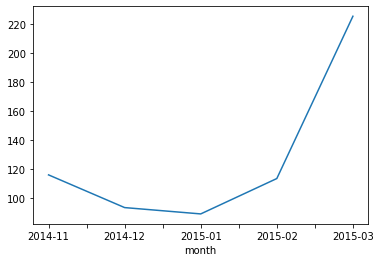

In [28]:
grouped.plot()

In [29]:
type(grouped)

pandas.core.series.Series

<AxesSubplot:xlabel='month'>

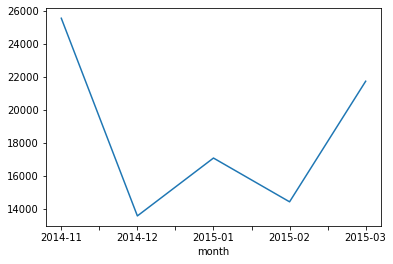

In [30]:
df_phone[df_phone['item'] == 'call'].groupby('month')['duration'].sum().plot()

In [32]:
df_phone.groupby('month', as_index=False).agg({'duration': 'sum'})

,month,duration
0,2014-11,26639.441
1,2014-12,14641.870
2,2015-01,18223.299
3,2015-02,15522.299
4,2015-03,22750.441


In [34]:
# 다채롭게 만들 수 있다.
df_phone.groupby(['month', 'item']).agg(
{
    'duration':sum,
    'network_type': 'count',
    'date': 'first',
}
)

duration  network_type                date
month   item                                             
2014-11 call  25547.000           107 2014-10-15 06:58:00
        data    998.441            29 2014-10-15 06:58:00
        sms      94.000            94 2014-10-16 22:18:00
2014-12 call  13561.000            79 2014-11-14 17:24:00
        data   1032.870            30 2014-11-13 06:58:00
        sms      48.000            48 2014-11-14 17:28:00
2015-01 call  17070.000            88 2014-12-15 20:03:00
        data   1067.299            31 2014-12-13 06:58:00
        sms      86.000            86 2014-12-15 19:56:00
2015-02 call  14416.000            67 2015-01-15 10:36:00
        data   1067.299            31 2015-01-13 06:58:00
        sms      39.000            39 2015-01-15 12:23:00
2015-03 call  21727.000            47 2015-02-12 20:15:00
        data    998.441            29 2015-02-13 06:58:00
        sms      25.000            25 2015-02-19 18:46:00

#### 1.1.3 유용한 함수

- Pivot table  
groupby와 unstack으로 할 수 있지만 더 간단하게 표현 가능하다.(엑셀과 유사하다.)

In [37]:
df_phone.pivot_table(['duration'],
                    index=[df_phone.month,df_phone.item],
                    columns=df_phone.network, aggfunc='sum', fill_value=0)

duration                                                   \
network        Meteor Tesco  Three Vodafone      data landline special   
month   item                                                             
2014-11 call     1521  4045  12458     4316     0.000     2906       0   
        data        0     0      0        0   998.441        0       0   
        sms        10     3     25       55     0.000        0       1   
2014-12 call     2010  1819   6316     1302     0.000     1424       0   
        data        0     0      0        0  1032.870        0       0   
        sms        12     1     13       18     0.000        0       0   
2015-01 call     2207  2904   6445     3626     0.000     1603       0   
        data        0     0      0        0  1067.299        0       0   
        sms        10     3     33       40     0.000        0       0   
2015-02 call     1188  4087   6279     1864     0.000      730       0   
        data        0     0      0        0  1067.299        0       0   
        sms         1     2     11       23     0.000        0       2   
2015-03 call      274   973   4966     3513     0.000    11770       0   
        data        0     0      0        0   998.441        0       0   
        sms         0     4      5       13     0.000        0       0   

                              
network      voicemail world  
month   item                  
2014-11 call       301     0  
        data         0     0  
        sms          0     0  
2014-12 call       690     0  
        data         0     0  
        sms          0     4  
2015-01 call       285     0  
        data         0     0  
        sms          0     0  
2015-02 call       268     0  
        data         0     0  
        sms          0     0  
2015-03 call       231     0  
        data         0     0  
        sms          0     3

- Crosstab  
두 칼럼의 교차 빈도, 비율, 덧셈 등을 구할 때 사용  
네트워크 형식의 dataframe

- Merge & Concat  
데이터를 합치고 붙이는 경우  
Merge는 SQL에서 많이 사용하는 Merge와 같은 기능

In [38]:
raw_data = {
    "subject_id": ["1", "2", "3", "4", "5", "7", "8", "9", "10", "11"],
    "test_score": [51, 15, 15, 61, 16, 14, 15, 1, 61, 16],
}
df_a = pd.DataFrame(raw_data, columns=["subject_id", "test_score"])
df_a

,subject_id,test_score
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


In [39]:
raw_data = {
    "subject_id": ["4", "5", "6", "7", "8"],
    "first_name": ["Billy", "Brian", "Bran", "Bryce", "Betty"],
    "last_name": ["Bonder", "Black", "Balwner", "Brice", "Btisan"],
}
df_b = pd.DataFrame(raw_data, columns=["subject_id", "first_name", "last_name"])
df_b

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [40]:
pd.merge(df_a,df_b, left_on='subject_id', right_on='subject_id')

,subject_id,test_score,first_name,last_name
0,4,61,Billy,Bonder
1,5,16,Brian,Black
2,7,14,Bryce,Brice
3,8,15,Betty,Btisan


merge의 join 규칙  

inner join, full join, left join, right join

pd.merge 함수 설명 보고 이해 하도록 연습

In [41]:
pd.merge(df_a, df_b, on='subject_id', how='outer')

,subject_id,test_score,first_name,last_name
0,1,51.0,NaN,NaN
1,2,15.0,NaN,NaN
2,3,15.0,NaN,NaN
3,4,61.0,Billy,Bonder
4,5,16.0,Brian,Black
5,7,14.0,Bryce,Brice
6,8,15.0,Betty,Btisan
7,9,1.0,NaN,NaN
8,10,61.0,NaN,NaN
9,11,16.0,NaN,NaN


concat은 리스트 형태로 붙이는 규칙이 있다.  
axis 적용 가능하다.

In [45]:
df_new = pd.concat([df_a, df_b])
df_new

,subject_id,test_score,first_name,last_name
0,1,51.0,NaN,NaN
1,2,15.0,NaN,NaN
2,3,15.0,NaN,NaN
3,4,61.0,NaN,NaN
4,5,16.0,NaN,NaN
5,7,14.0,NaN,NaN
6,8,15.0,NaN,NaN
7,9,1.0,NaN,NaN
8,10,61.0,NaN,NaN
9,11,16.0,NaN,NaN


In [ ]:
- database를 연결 할 수 있다.  
구현해보자.

## 2. 피어 세션 정리

#### 2.1 스터디

- 2.1.1 optimizer와 loss function에 대한 식 구성과 활용 이유에 대한 발표를 하였다.(발표: 배새봄)

- 2.1.2 pandas를 이용하여 실제 데이터를 가져와서 통계적 활용이 어떻게 이루어지는지 알아보았다.(발표 안동주)


#### 2.2 원하는 진로를 잡고 논문 공부

- Deep Learning : Yann LeCnn, Yoshua Bengio & Geoffrey Hinton
딥러닝에 대한 전반적인 이해를 돕고 AI 논문에 대한 언어 장벽을 없애기 위해 필요하며 발표 예정

## 3. 진행중인 공부 및 신규 공부 목록

- 진행중인 공부  

    - Deep learning 논문 읽고 정리하기
    - AI 기본 수학 : Mathematics for Machine learning - Marc Peter Deisenroth
    - 웹 크롤링 및 데이터 처리 연습 익숙해지기
    - Numpy를 이용하여 프로젝트 하나 진행해보기 (wav파일로 악보를 추출하는 것을 계획중)
    - Numpy, Pandas 연산 반복 학습 하기

- 신규 공부 목록  


- 완료한 공부  

## 4. 감사한 일

- 항상 밝은 에너지로 더 열심히 하는 것을 추구하는 우리 팀원들에게 감사합니다. 다들 다른 장점을 가지고 함께 성장하는 상황이 주어진 것이 너무 감사합니다.
- 다른 팀원들의 피어세션에 대해 알 수 있도록 자리 마련해준 운영진 분들에게 감사합니다.